# Predict shapes

In [1]:
import sys
sys.path.insert(0, "..")
import os
from glob import glob
import natsort
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
from pathlib import Path
import shutil
import torch
import torch.nn as nn

from sklearn.metrics import confusion_matrix
from PIL import Image

In [2]:
from dataloader import load_images, load_masks, mask2rgb, rgb2mask, get_image_names
from lib import compose_image, plot_patches, input_filled_mirroring
from model import UNet, make_dataloaders, IoU, UnetFracture

In [3]:
PATH_PARAMETERS = '../params.json'

with open(PATH_PARAMETERS) as f:
    params = json.load(f)

model_params = params['shape_segmentation']['patches_moonrise']

In [4]:
mode = 'train'
file_names = get_image_names(mode=mode)
images = load_images(file_names,mode=mode)
masks = load_masks(file_names,mode=mode)


found 87 images
no images: 87
no masks: 87


(-0.5, 1999.5, 1332.5, -0.5)

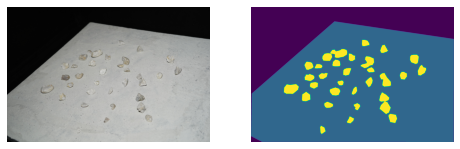

In [5]:
ix = 1

fig, ax = plt.subplots(1,2, figsize=(8,10))
ax[0].imshow(images[ix], cmap='gray')
ax[0].axis('off')
ax[1].imshow(masks[ix])
ax[1].axis('off')

In [6]:
model = UnetFracture(model_params)
model.initialize()

In [7]:
ix = 1
image = images[ix]
mask_rgb = masks[ix]
mask_labels = rgb2mask(mask_rgb).astype(int)

mask_prob = model.predict_proba(image)
mask_predict = model.predict_image(image)
mask_predict_rgb = mask2rgb(mask_predict)
class_iou, mean_iou = IoU(mask_labels, mask_predict, model_params['n_classes'])

already 2d image


Class IoU: 0.973 0.994 nan nan   |  Mean IoU: 0.983


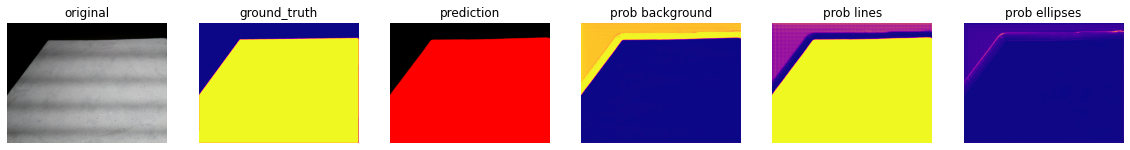

In [13]:
fig, ax = plt.subplots(1,7,figsize=(20,20))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')
ax[1].imshow(mask_rgb, cmap='plasma')
ax[1].set_title('ground_truth')
ax[1].axis('off')
ax[2].imshow(mask_predict_rgb, cmap='plasma')
ax[2].set_title('prediction')
ax[2].axis('off')
ax[3].imshow(mask_prob[:,:,0], cmap='plasma')
ax[3].set_title('prob background')
ax[3].axis('off')
ax[4].imshow(mask_prob[:,:,1], cmap='plasma')
ax[4].set_title('prob lines')
ax[4].axis('off')
ax[5].imshow(mask_prob[:,:,2], cmap='plasma')
ax[5].set_title('prob ellipses')
ax[5].axis('off')

print('Class IoU:', ' '.join(f'{x:.3f}' for x in class_iou), f'  |  Mean IoU: {mean_iou:.3f}')

In [10]:
m_ious = []
cf_ious = []

for i, (image,mask_rgb) in enumerate(zip(images,masks)):
    
    mask_labels = rgb2mask(mask_rgb).astype(int)
    mask_prob = model.predict_proba(image)
    mask_predict = model.predict_image(image)
    mask_predict_rgb = mask2rgb(mask_predict)
    
    class_iou, mean_iou = IoU(mask_labels, mask_predict, model_params['n_classes'])
    
    m_ious.append(mean_iou)
    
    
    print(f'{i}: Class IoU:', ' '.join(f'{x:.3f}' for x in class_iou), f'  |  Mean IoU: {mean_iou:.3f}')
#     plot_results(img, img_bin, mask_rgb, img_prob, sines) 

already 2d image
0: Class IoU: 0.993 0.986 0.000 0.852   |  Mean IoU: 0.708
already 2d image
1: Class IoU: 0.985 0.974 0.000 0.772   |  Mean IoU: 0.683
already 2d image
2: Class IoU: 0.987 0.975 0.669 0.862   |  Mean IoU: 0.873
already 2d image
3: Class IoU: 0.986 0.968 0.636 0.829   |  Mean IoU: 0.855
already 2d image
4: Class IoU: 0.682 0.938 0.638 0.850   |  Mean IoU: 0.777
already 2d image
5: Class IoU: 0.898 0.956 0.705 0.827   |  Mean IoU: 0.847
already 2d image
6: Class IoU: 0.008 0.888 0.767 0.748   |  Mean IoU: 0.603
already 2d image
7: Class IoU: 0.000 0.940 0.628 0.792   |  Mean IoU: 0.590
already 2d image
8: Class IoU: 0.981 0.981 0.689 0.872   |  Mean IoU: 0.881
already 2d image
9: Class IoU: 0.892 0.948 0.722 0.826   |  Mean IoU: 0.847
already 2d image
10: Class IoU: 0.980 0.978 0.672 0.855   |  Mean IoU: 0.872
already 2d image
11: Class IoU: 0.942 0.963 0.682 0.868   |  Mean IoU: 0.864
already 2d image
12: Class IoU: 0.924 0.980 0.751 0.874   |  Mean IoU: 0.882
already 2

C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


46: Class IoU: 0.993 0.998 nan nan   |  Mean IoU: 0.996
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


47: Class IoU: 0.985 0.996 nan nan   |  Mean IoU: 0.991
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


48: Class IoU: 0.972 0.992 nan 0.000   |  Mean IoU: 0.655
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


49: Class IoU: 0.993 0.998 nan nan   |  Mean IoU: 0.996
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


50: Class IoU: 0.983 0.995 nan nan   |  Mean IoU: 0.989
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


51: Class IoU: 0.983 0.995 nan nan   |  Mean IoU: 0.989
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


52: Class IoU: 0.977 0.993 nan 0.000   |  Mean IoU: 0.657
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


53: Class IoU: 0.990 0.997 nan nan   |  Mean IoU: 0.993
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


54: Class IoU: 0.985 0.996 nan nan   |  Mean IoU: 0.990
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


55: Class IoU: 0.990 0.997 nan nan   |  Mean IoU: 0.994
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


56: Class IoU: 0.983 0.995 nan nan   |  Mean IoU: 0.989
already 2d image
57: Class IoU: 0.994 0.982 0.000 0.897   |  Mean IoU: 0.718
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


58: Class IoU: 0.988 0.996 nan nan   |  Mean IoU: 0.992
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


59: Class IoU: 0.979 0.977 nan 0.879   |  Mean IoU: 0.945
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


60: Class IoU: 0.989 0.996 nan nan   |  Mean IoU: 0.992
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


61: Class IoU: 0.988 0.982 nan 0.895   |  Mean IoU: 0.955
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


62: Class IoU: 0.977 0.980 nan 0.915   |  Mean IoU: 0.957
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


63: Class IoU: 0.983 0.980 nan 0.921   |  Mean IoU: 0.961
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


64: Class IoU: 0.983 0.975 nan 0.934   |  Mean IoU: 0.964
already 2d image
65: Class IoU: 0.975 0.975 0.000 0.943   |  Mean IoU: 0.723
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


66: Class IoU: 0.989 0.996 nan nan   |  Mean IoU: 0.993
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


67: Class IoU: 0.981 0.975 nan 0.862   |  Mean IoU: 0.939
already 2d image
68: Class IoU: 0.961 0.990 0.000 0.000   |  Mean IoU: 0.488
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


69: Class IoU: 0.979 0.990 nan nan   |  Mean IoU: 0.984
already 2d image


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


70: Class IoU: 0.984 0.981 nan 0.883   |  Mean IoU: 0.949
already 2d image
71: Class IoU: 0.965 0.981 0.637 0.918   |  Mean IoU: 0.875
already 2d image
72: Class IoU: 0.981 0.989 0.349 0.971   |  Mean IoU: 0.822
already 2d image
73: Class IoU: 0.979 0.985 0.602 0.886   |  Mean IoU: 0.863
already 2d image
74: Class IoU: 0.989 0.987 0.562 0.920   |  Mean IoU: 0.865
already 2d image
75: Class IoU: 0.955 0.991 0.528 0.915   |  Mean IoU: 0.847
already 2d image
76: Class IoU: 0.985 0.980 0.477 0.766   |  Mean IoU: 0.802
already 2d image
77: Class IoU: 0.985 0.990 0.297 0.924   |  Mean IoU: 0.799
already 2d image
78: Class IoU: 0.965 0.980 0.375 0.895   |  Mean IoU: 0.804
already 2d image
79: Class IoU: 0.979 0.979 0.432 0.921   |  Mean IoU: 0.828
already 2d image
80: Class IoU: 0.408 0.958 0.145 0.872   |  Mean IoU: 0.596
already 2d image
81: Class IoU: 0.339 0.968 0.460 0.836   |  Mean IoU: 0.651
already 2d image
82: Class IoU: 0.976 0.988 0.655 0.913   |  Mean IoU: 0.883
already 2d image
8

C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


85: Class IoU: 0.986 0.990 nan nan   |  Mean IoU: 0.988
already 2d image
86: Class IoU: 0.973 0.994 nan nan   |  Mean IoU: 0.983


C:\Users\p.dyroey\Downloads\unet-multiclass-pytorch-master\notebooks\..\model\eval.py:19: RuntimeWarning: invalid value encountered in divide
  iou = true_positives / denominator


In [11]:
print(np.mean(m_ious))

0.8260399005060679
